# pn9-decision trees

In [1]:
#decision tree template
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb = pd.read_csv("abnb_listings_rdcd.csv")
del abnb["Unnamed: 0"]
abnb.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

/Users/tonyktan/Desktop/GA/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
abnb.head()

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89,0.28
1,6938818,37.781505,-122.504754,11.875956,Best Secret in Town Convenience is the key for...,-1.416978,142.333333,1,92,2.33
2,4781448,37.781797,-122.492492,11.875955,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,5.781405,940.000000,1,100,0.36
3,1931937,37.781564,-122.494424,11.875955,Blocks from GG Park & Ocean Beach Large 2BD ap...,-1.404158,136.666667,1,94,1.13
4,2134100,37.783888,-122.508557,11.875958,Ocean Beach hilltop cottage Newly built cottag...,-1.582193,178.333333,1,92,6.09


In [15]:
feature_cols = ['location', 'space', 'price', 'host', 'rating']
X = abnb[feature_cols]
y = abnb.reviews_per_month

In [16]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=1)

In [17]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn import cross_validation
scores = cross_validation.cross_val_score(dtr, X, y, cv=14, scoring="mean_squared_error")
np.mean(-scores)

5.1495288777013526

In [18]:
# try different max_depth values one-by-one
# What are their cross_val_score's?
depths, rmses = [], []
for depth in range(1,6):
    dtr = DecisionTreeRegressor(random_state=1, max_depth=depth)
    scores = cross_validation.cross_val_score(dtr, X, y, cv=14, scoring="mean_squared_error")
    depths.append(depth)
    rmses.append(np.mean(-scores))
    print depth, np.mean(-scores)

1 2.81676164077
2 2.72769769016
3 2.58554559399
4 2.5484844407
5 2.6370787739


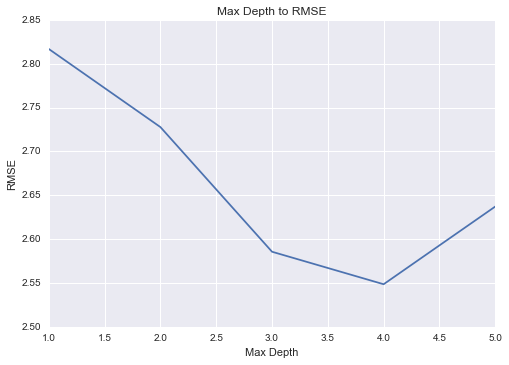

In [19]:
# Plot max_depth (x-axis) versus RMSE (y-axis)
# What's a good depth?
plt.plot(depths, rmses)
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.title("Max Depth to RMSE")

In [20]:
# max_depth=? was best, so fit a tree using that parameter
dtr = DecisionTreeRegressor(random_state=1, max_depth=4)
treereg = dtr.fit(X, y)

In [21]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,location,0.010499
1,space,0.006346
2,price,0.254564
3,host,0.227979
4,rating,0.500612


In [23]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_abnb.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_abnb.dot -o tree_abnb.png

![Image of airbnb regression tree](tree_abnb.png)

In [24]:
# classification tree
# what is y?
y_class = abnb.reviews_per_month > 3

In [25]:
# fit a classification tree with max_depth=4 on all data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1, max_depth=4)
treeclf = dtr.fit(X, y_class)

In [26]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_airbnb_c.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_airbnb_c.dot -o tree_airbnb_c.png

![Image of airbnb classification tree](tree_airbnb_c.png)

In [27]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,location,0.008355
1,space,0.030719
2,price,0.295464
3,host,0.224769
4,rating,0.440693
